In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import tensorflow as tf

# Define constants
HEIGHT = 768
WIDTH = 768
LR = 0.0001
EPOCHS = 10
BATCH_SIZE = 6

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True):
        self.data = data
        self.indices = np.arange(len(data["image"]))
        self.dim = dim
        self.n_channels = n_channels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data["image"]) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch = {"image": [self.data["image"][i] for i in indices],
                 "depth": [self.data["depth"][i] for i in indices]}
        X, y = self.__data_generation(batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (img_path, depth_path) in enumerate(zip(batch["image"], batch["depth"])):
            # Load the image
            img = cv2.imread(img_path)
            # Check if the image is loaded successfully and is not empty
            if img is None or img.size == 0:
                # Print the path of the problematic image for debugging
                print("Error loading image:", img_path)
                # Skip this image and continue to the next one
                continue

            # Resize the image
            img = cv2.resize(img, self.dim)
            img = img / 255.0
            X[i,] = img

            # Load the depth image
            depth = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
            # Check if the depth image is loaded successfully and is not empty
            if depth is None or depth.size == 0:
                # Print the path of the problematic depth image for debugging
                print("Error loading depth image:", depth_path)
                # Skip this depth image and continue to the next one
                continue

            # Resize the depth image
            depth = cv2.resize(depth, self.dim)
            depth = np.expand_dims(depth, axis=-1)
            depth = depth / 255.0
            y[i,] = depth

        return X, y

# Define the paths to your base images and depth maps
base_path = '/content/'
base_name = 'basename_'

# Load the data
data = {"image": [], "depth": []}
for i in range(71):
    data["image"].append(base_path + base_name + 'color_' + str(i) + '.png')
    data["depth"].append(base_path + base_name + 'depth_' + str(i) + '.png')

# Define the generator
train_generator = DataGenerator(data)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(HEIGHT, WIDTH, 3)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=LR), loss='mean_squared_error')

# Train the model
model.fit(train_generator, epochs=EPOCHS)

# Assuming you have a test_loader for testing
# Get a batch of test data
test_generator = DataGenerator(data)
# Plot images and predictions
plot_images_and_predictions(model, test_generator)

# Function to plot images and predictions
def plot_images_and_predictions(model, test_generator):
    for i in range(len(test_generator)):
        test_images, test_depths = test_generator[i]
        predictions = model.predict(test_images)

        for j in range(len(test_images)):
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(test_images[j])
            plt.title('RGB Image')
            plt.subplot(1, 3, 2)
            plt.imshow(test_depths[j].squeeze(), cmap='gray')
            plt.title('Ground-truth Depth')
            plt.subplot(1, 3, 3)
            plt.imshow(predictions[j].squeeze(), cmap='gray')
            plt.title('Predicted Depth')
            plt.show()




Epoch 1/10
12/12 [==============================] - 14s 259ms/step - loss: 0.1263
Epoch 2/10
12/12 [==============================] - 4s 294ms/step - loss: 0.0697
Epoch 3/10
12/12 [==============================] - 4s 285ms/step - loss: 0.0190
Epoch 4/10
12/12 [==============================] - 4s 283ms/step - loss: 0.0097
Epoch 5/10
12/12 [==============================] - 4s 294ms/step - loss: 0.0103
Epoch 6/10
12/12 [==============================] - 4s 284ms/step - loss: 0.0076
Epoch 7/10
 2/12 [====>.........................] - ETA: 2s - loss: inf   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py:941: RuntimeWarning: overflow encountered in cast
  return np.array(t, dtype=backend.floatx())


12/12 [==============================] - 4s 279ms/step - loss: nan
Epoch 8/10
 3/12 [======>.......................] - ETA: 2s - loss: nan

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import cv2

# Define the paths to your base images and depth maps
base_path = '/content/'
base_name = 'basename_'

# Define constants for DataGenerator
HEIGHT = 768
WIDTH = 768
BATCH_SIZE = 6

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True):
        self.data = data
        self.indices = np.arange(len(data["image"]))
        self.dim = dim
        self.n_channels = n_channels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data["image"]) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch = {"image": [self.data["image"][i] for i in indices],
                 "depth": [self.data["depth"][i] for i in indices]}
        X, y = self.__data_generation(batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (img_path, depth_path) in enumerate(zip(batch["image"], batch["depth"])):
            # Load the image
            img = img_to_array(load_img(img_path))
            # Check if the image is loaded successfully and is not empty
            if img is None or img.size == 0:
                # Print the path of the problematic image for debugging
                print("Error loading image:", img_path)
                # Skip this image and continue to the next one
                continue

            # Resize the image
            img = tf.image.resize(img, self.dim)
            img = img / 255.0
            X[i,] = img

            # Load the depth image
            depth = img_to_array(load_img(depth_path, color_mode='grayscale'))
            # Check if the depth image is loaded successfully and is not empty
            if depth is None or depth.size == 0:
                # Print the path of the problematic depth image for debugging
                print("Error loading depth image:", depth_path)
                # Skip this depth image and continue to the next one
                continue

            depth = depth / 255.0
            y[i,] = depth

        return X, y

# Load and preprocess the data
num_images = 71
input_shape = (768, 768, 3)  # Adjust according to your image dimensions

X_train = np.zeros((num_images, *input_shape))
Y_train = np.zeros((num_images, *input_shape))

for i in range(num_images):
    # Load RGB image and depth map
    rgb_img = img_to_array(load_img(base_path + base_name + 'color_' + str(i) + '.png'))
    depth_img = img_to_array(load_img(base_path + base_name + 'depth_' + str(i) + '.png', color_mode='grayscale'))

    # Normalize the images
    rgb_img = rgb_img / 255.0
    depth_img = depth_img / 255.0

    X_train[i] = rgb_img
    Y_train[i] = depth_img

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='relu', padding='same')  # Change activation to 'relu'
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=600, batch_size=16, validation_split=0.1)

# Assuming you have a test_loader for testing
# Get a batch of test data
test_loader = DataGenerator(
    data={"image": [base_path + base_name + 'color_' + str(i) + '.png' for i in range(num_images)],
          "depth": [base_path + base_name + 'depth_' + str(i) + '.png' for i in range(num_images)]},
    batch_size=10,
    dim=(HEIGHT, WIDTH),
    shuffle=False
)

# Get a batch of test data
batch_data = next(iter(test_loader))
test_images, test_depths = batch_data[0], batch_data[1]

# Plot images and predictions with Gaussian smoothing
predictions = model.predict(test_images)

for i in range(len(test_images)):
    smoothed_prediction = cv2.GaussianBlur(predictions[i].squeeze(), (15, 15), 0)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i])
    plt.title('RGB Image')
    plt.subplot(1, 3, 2)
    plt.imshow(test_depths[i].squeeze(), cmap='gray')
    plt.title('Ground-truth Depth')
    plt.subplot(1, 3, 3)
    plt.imshow(smoothed_prediction, cmap='gray')
    plt.title('Predicted Depth (Smoothed)')
    plt.show()


Epoch 1/600


KeyboardInterrupt: 

In [ ]:
model.save("/content/Phase1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 51ms/step


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

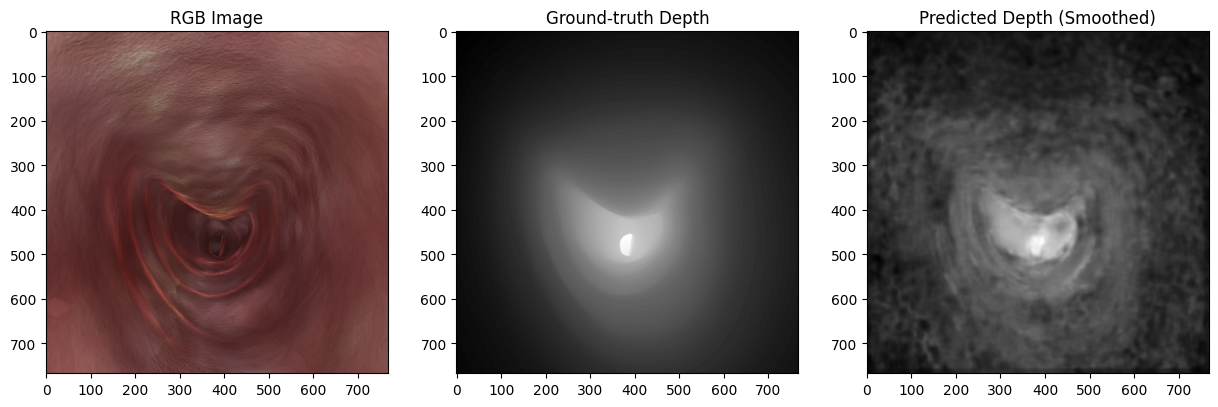

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

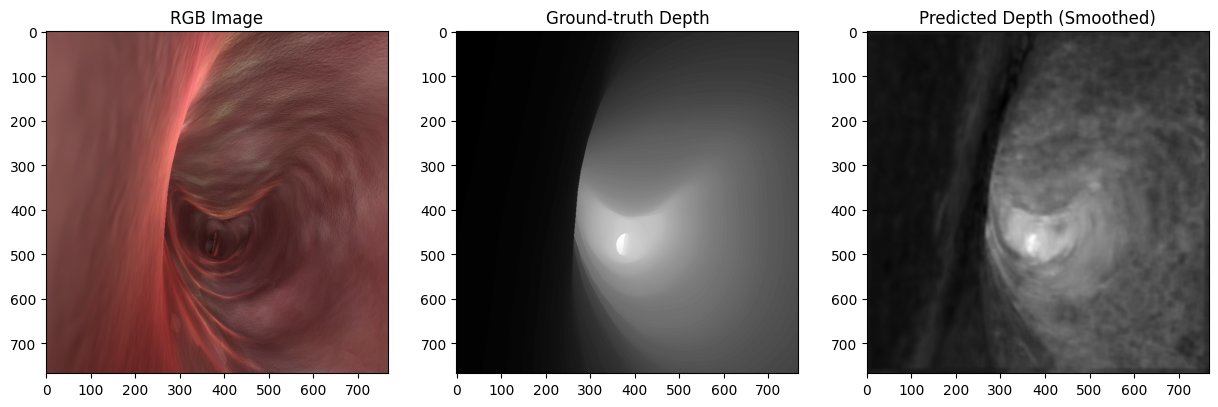

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

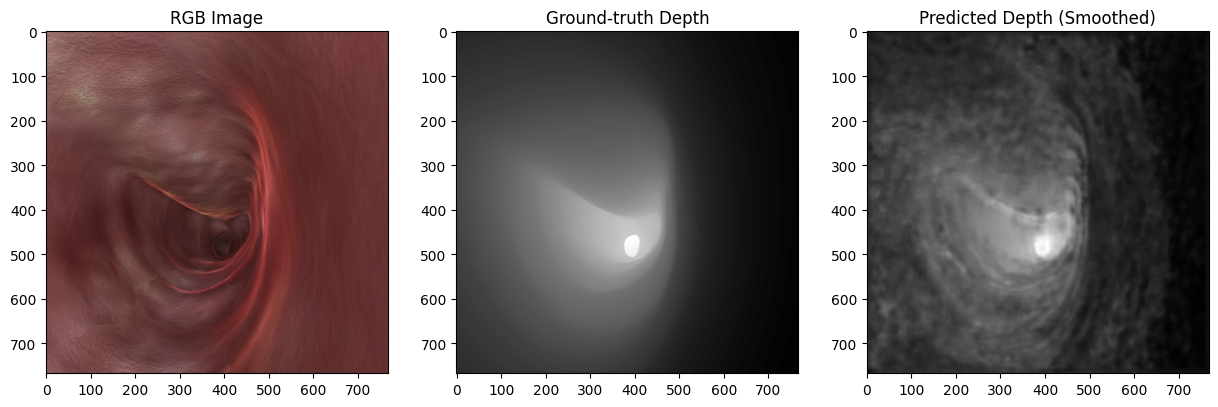

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

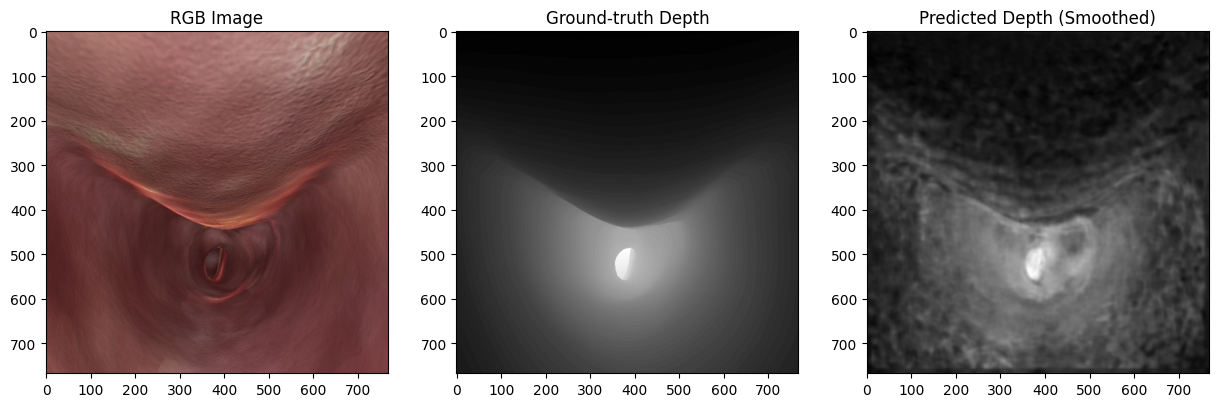

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

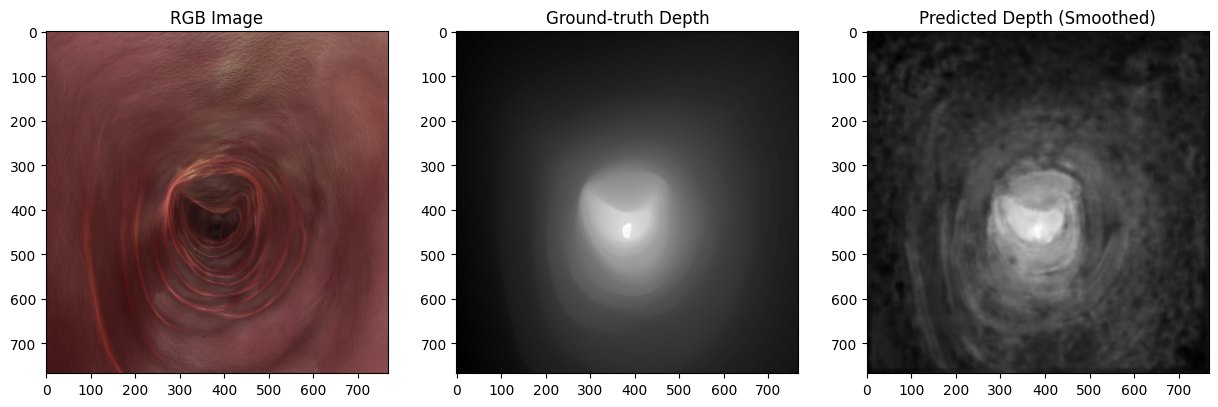

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

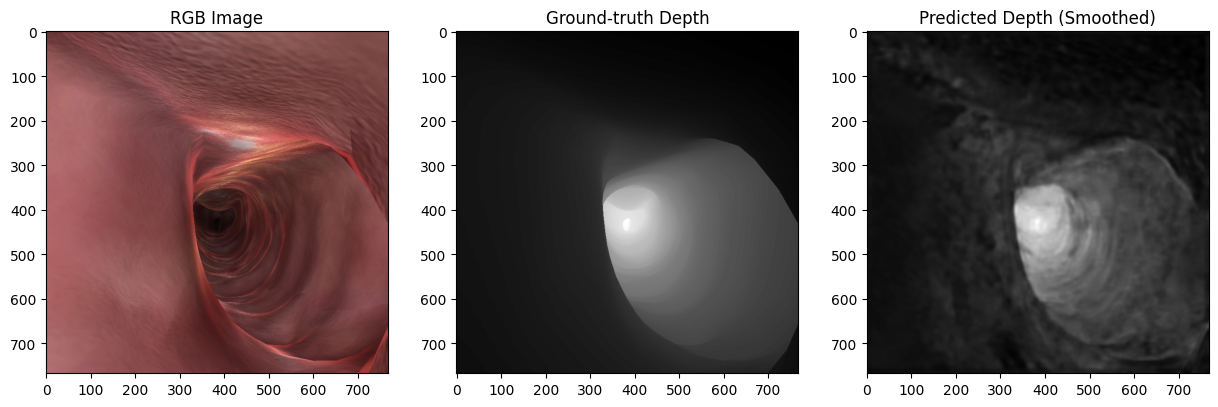

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

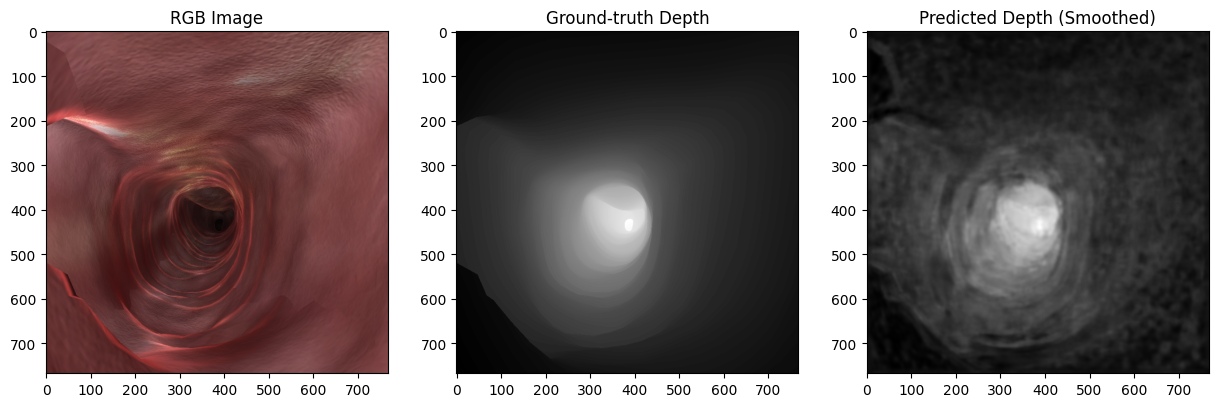

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

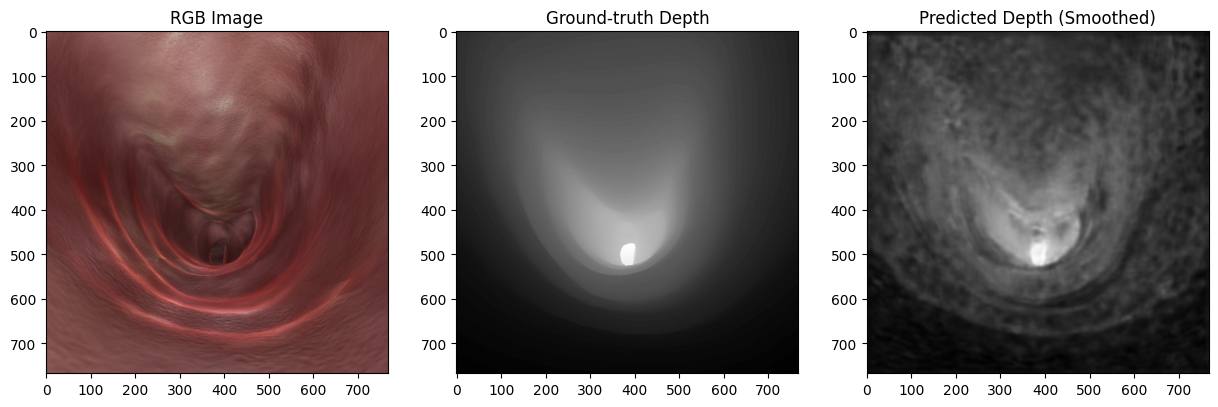

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

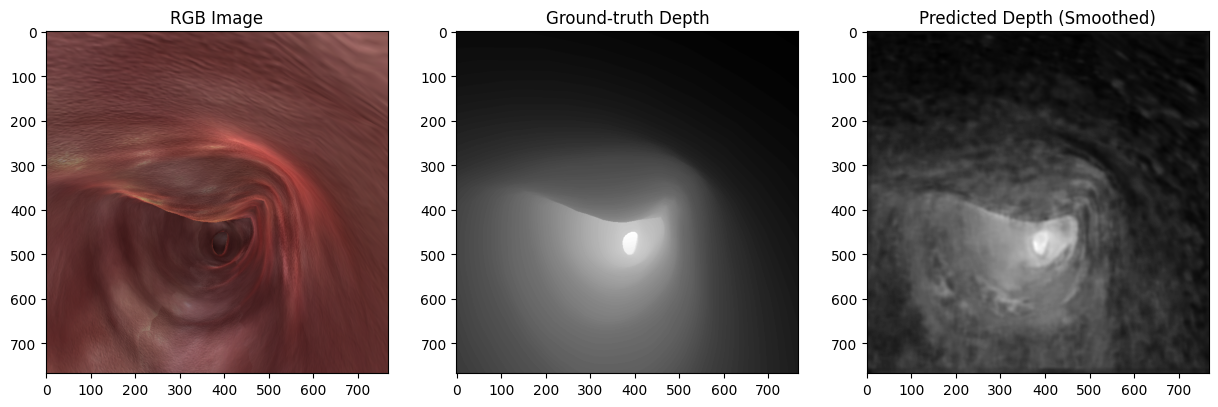

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

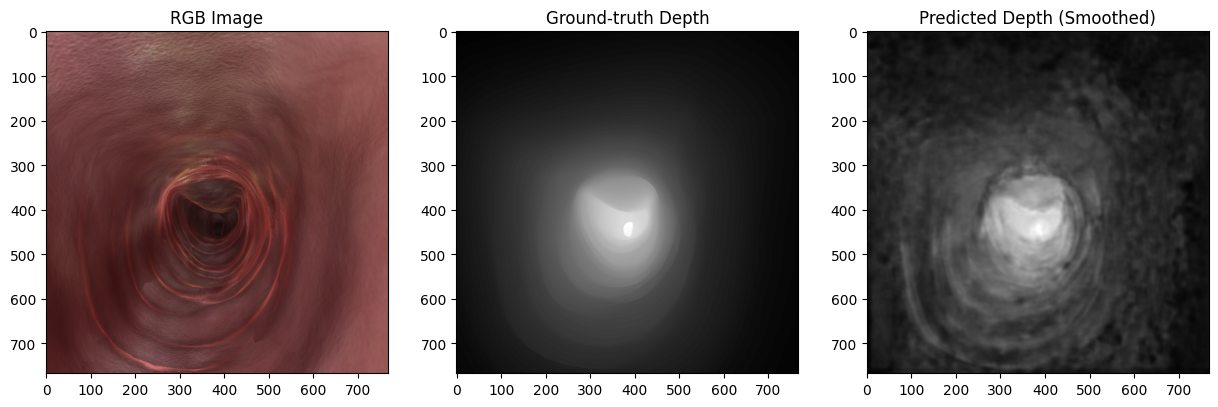

In [ ]:
# Plot images and predictions with Gaussian smoothing (increased smoothing)
predictions = model.predict(test_images)

for i in range(len(test_images)):
    smoothed_prediction = cv2.resize(predictions[i].squeeze(), (768, 768))  # Resize predicted depth map
    smoothed_prediction = cv2.GaussianBlur(smoothed_prediction, (5, 5), 0)  # Apply Gaussian smoothing
    # Apply bilateral filtering with edge-preserving capabilities
    denoised_prediction = cv2.bilateralFilter(smoothed_prediction, d=9, sigmaColor=25, sigmaSpace=25)
    plt.figure(figsize=(15, 5))
    plt.figure(figsize=(15, 5))
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i])
    plt.title('RGB Image')
    plt.subplot(1, 3, 2)
    plt.imshow(test_depths[i].squeeze(), cmap='gray')
    plt.title('Ground-truth Depth')
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_prediction, cmap='gray')
    plt.title('Predicted Depth (Smoothed)')
    plt.show()

In [1]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('Phase1.h5')

# Use the loaded model for predictions or further training


1/1 [==============================] - 0s 50ms/step


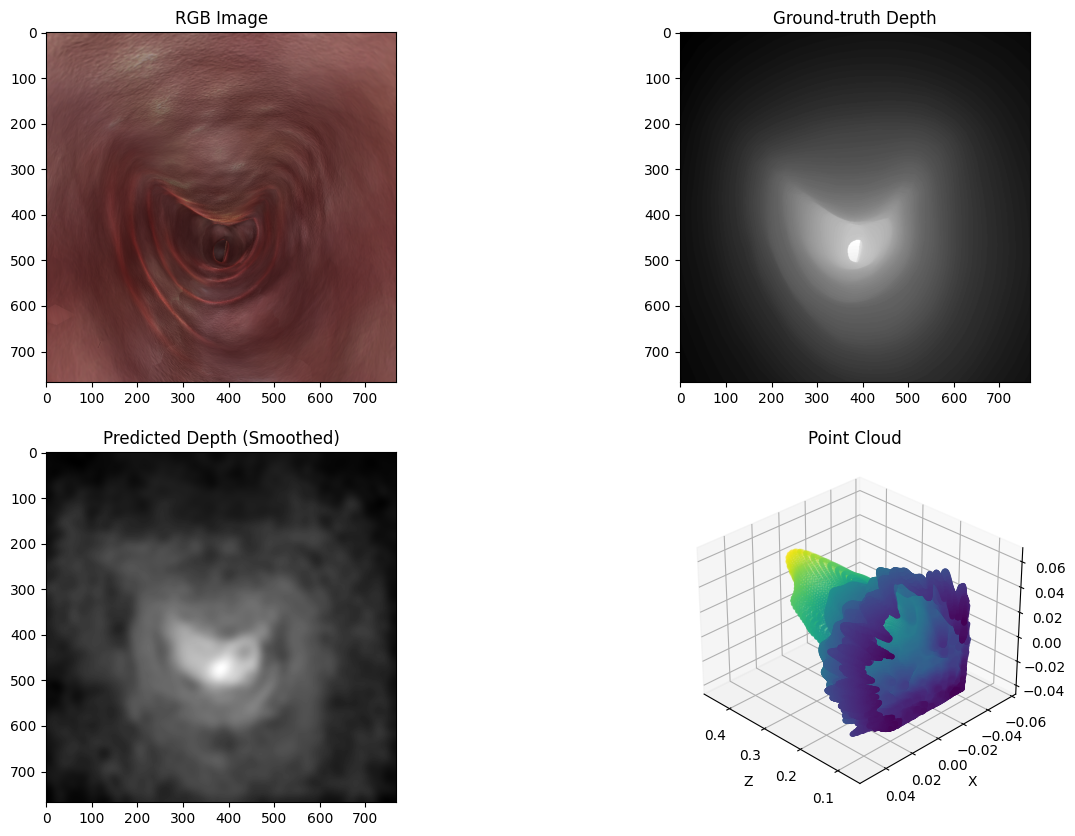

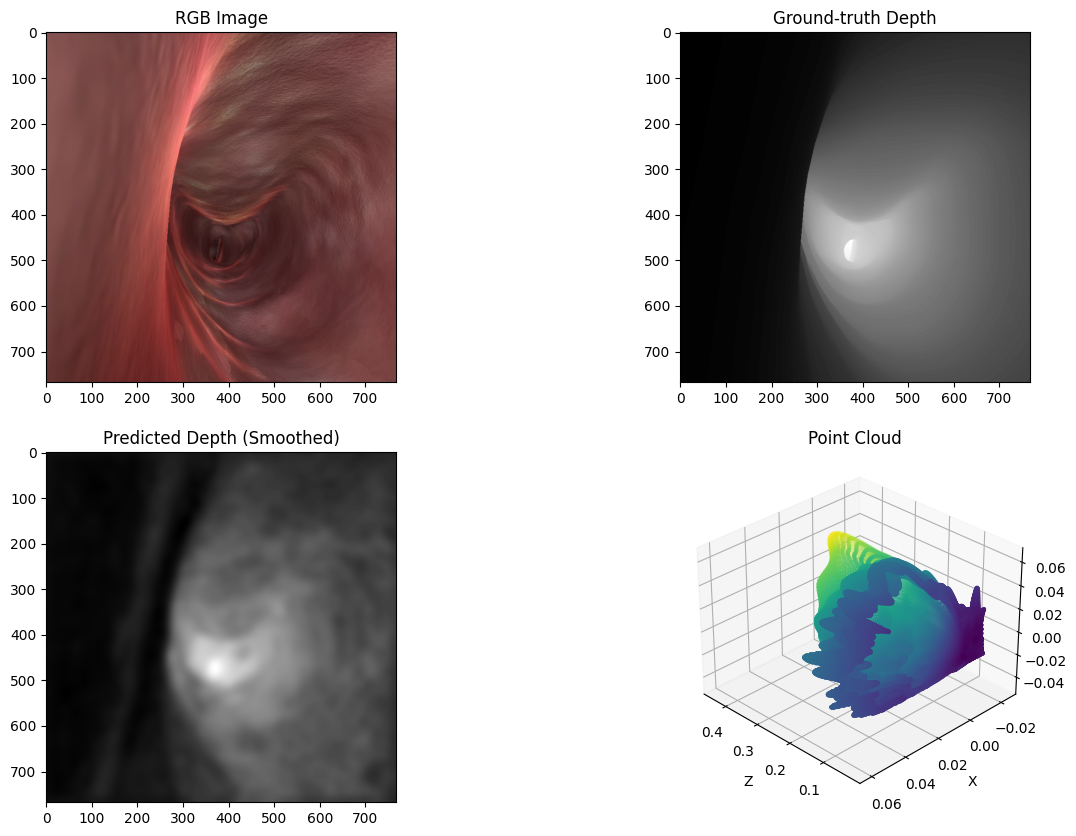

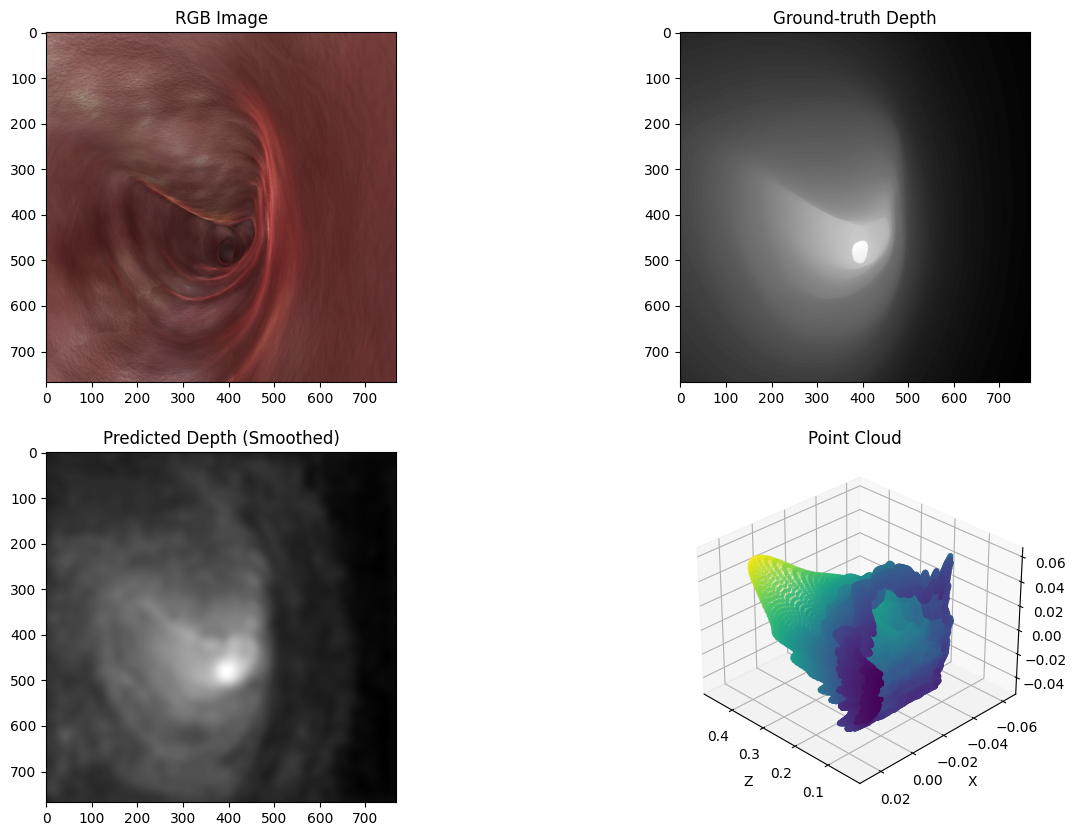

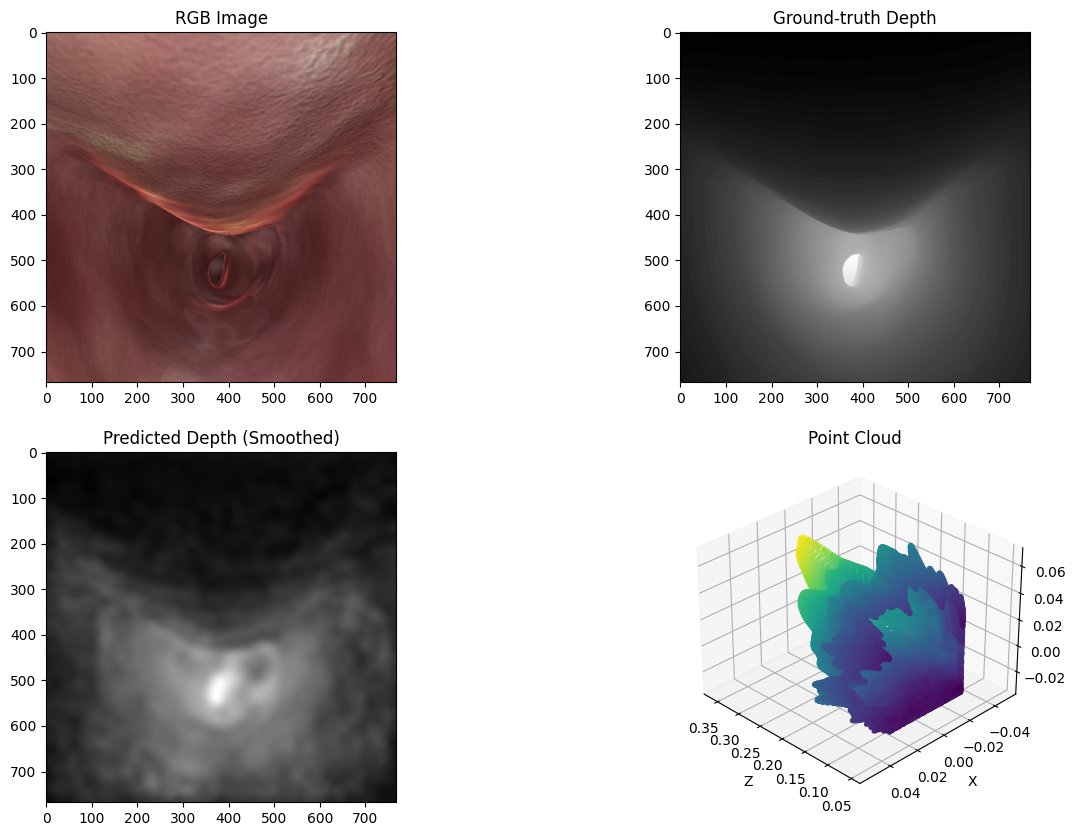

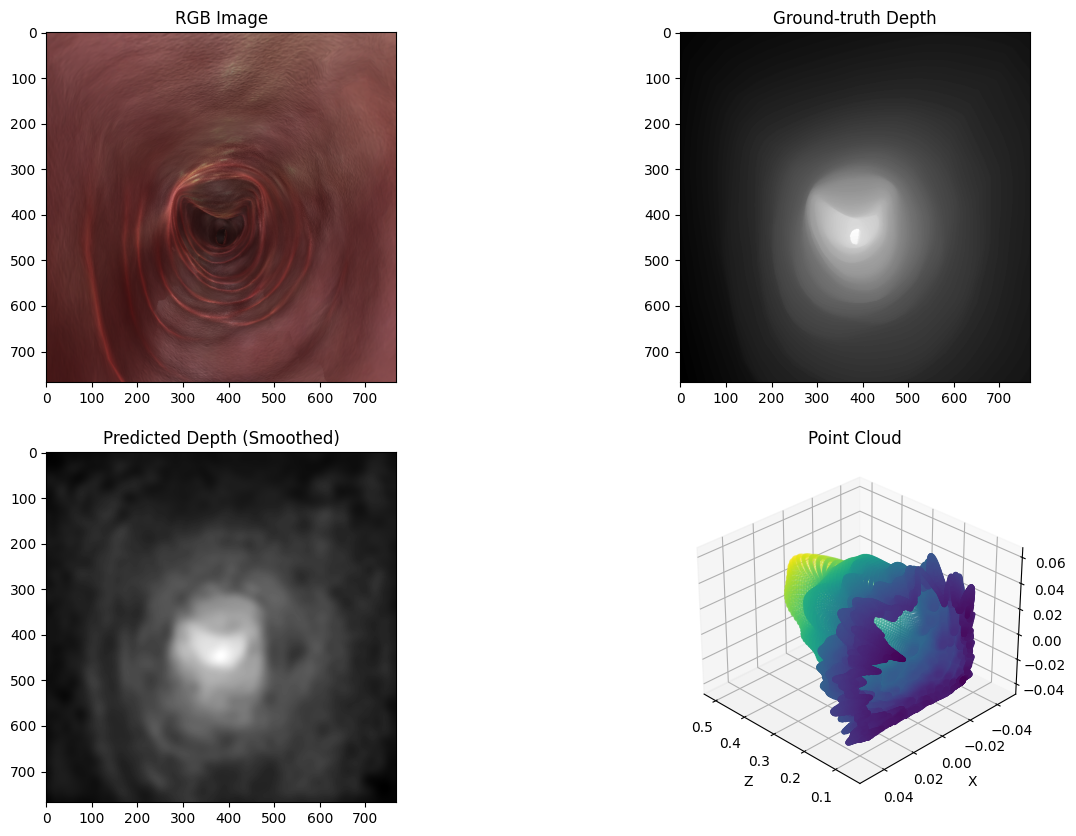

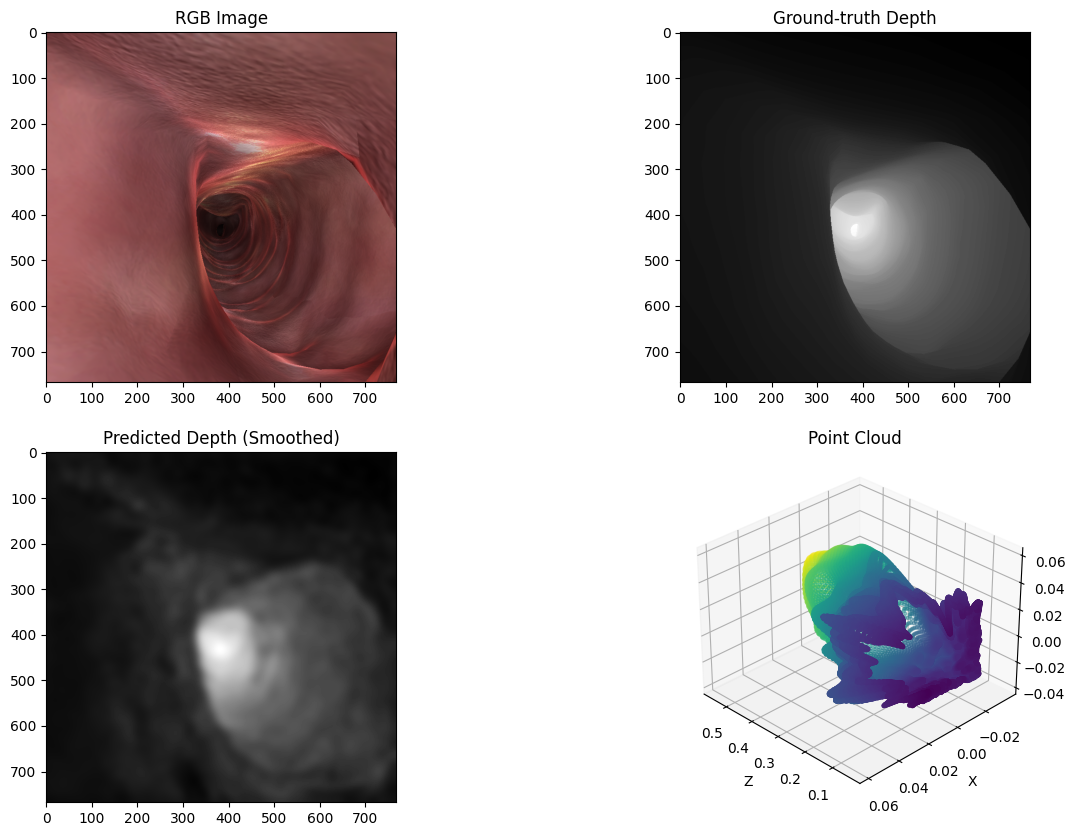

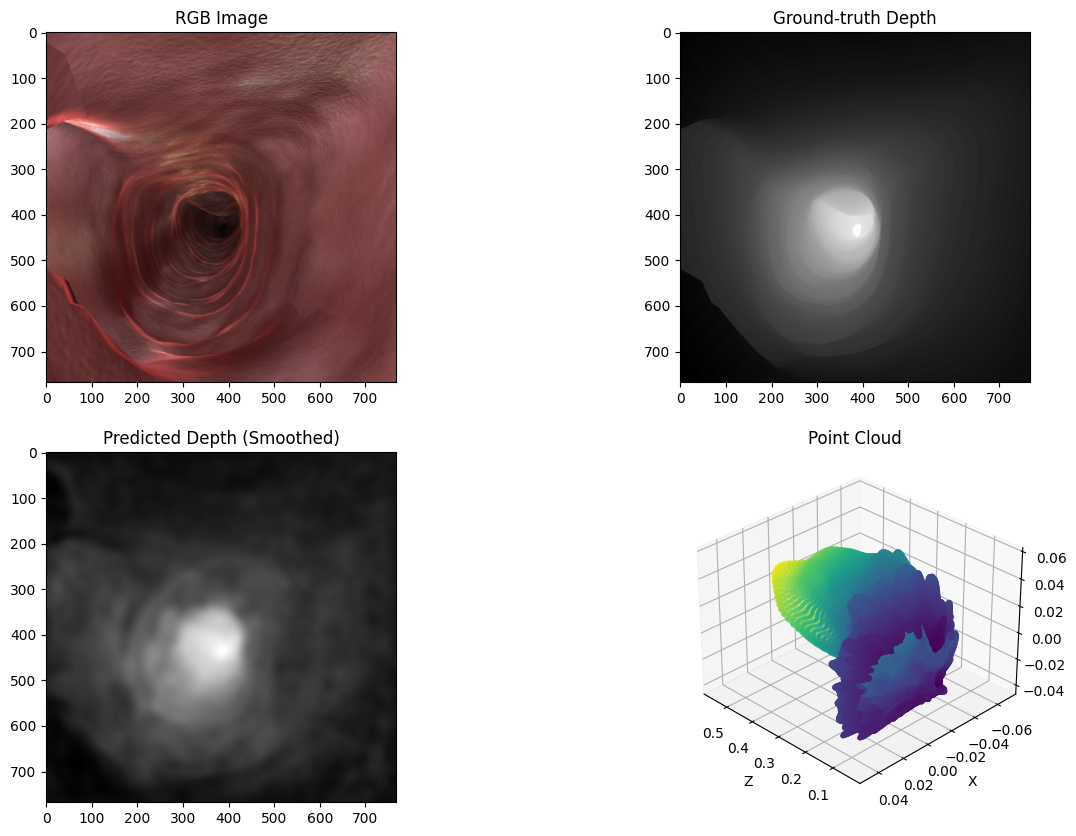

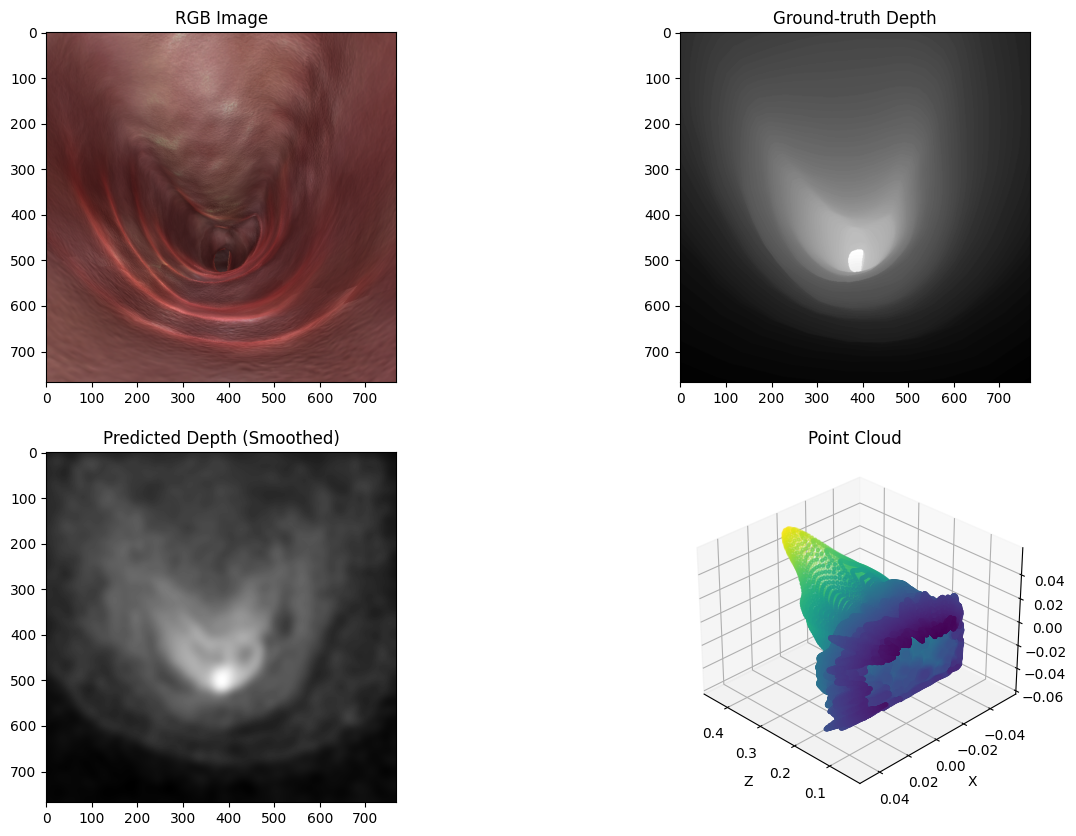

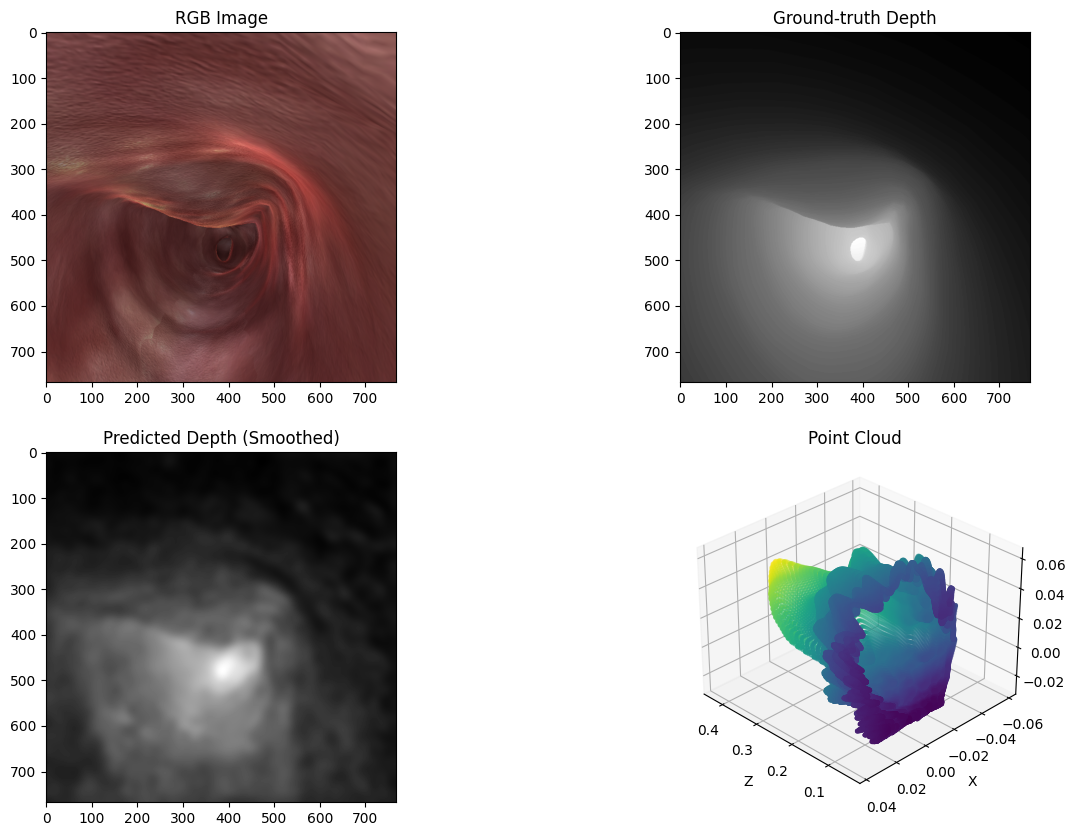

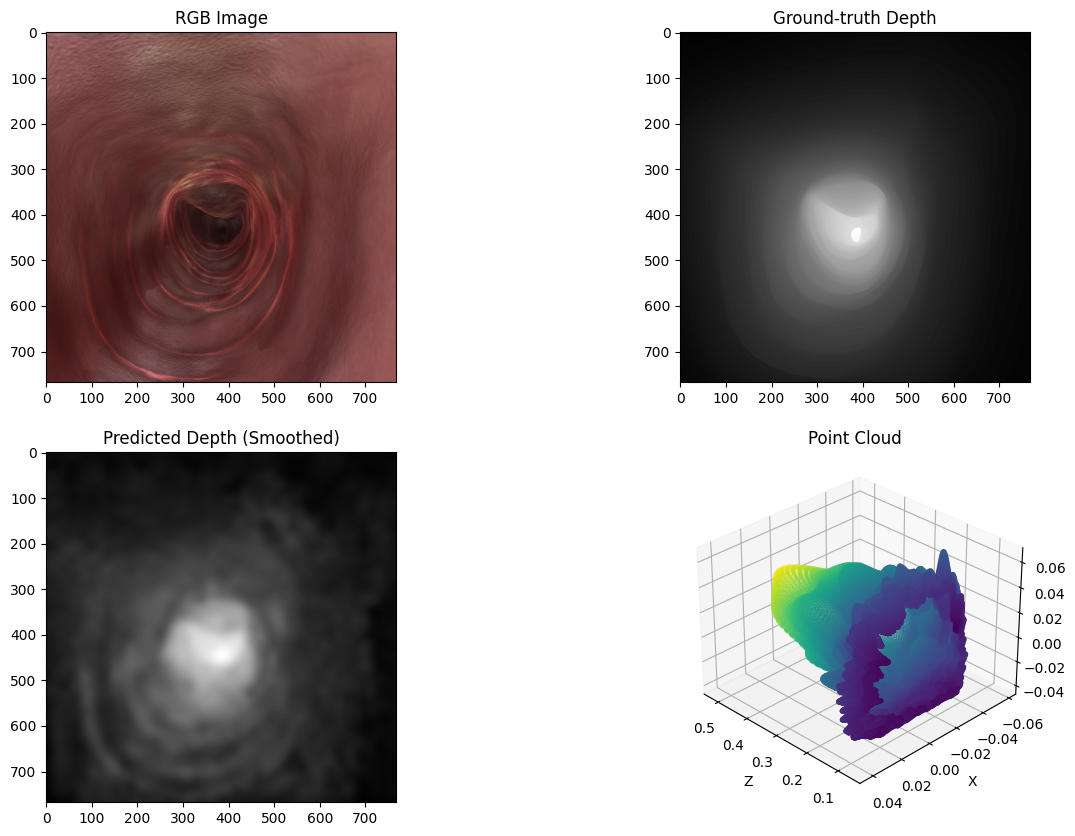

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import cv2

# Define the paths to your base images and depth maps
base_path = '/content/'
base_name = 'basename_'

# Define constants for DataGenerator
HEIGHT = 768
WIDTH = 768
BATCH_SIZE = 6

num_images = 71
input_shape = (768, 768, 3)  # Adjust according to your image dimensions

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True):
        self.data = data
        self.indices = np.arange(len(data["image"]))
        self.dim = dim
        self.n_channels = n_channels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.data["image"]) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch = {"image": [self.data["image"][i] for i in indices],
                 "depth": [self.data["depth"][i] for i in indices]}
        X, y = self.__data_generation(batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, 1))

        for i, (img_path, depth_path) in enumerate(zip(batch["image"], batch["depth"])):
            # Load the image
            img = img_to_array(load_img(img_path))
            # Check if the image is loaded successfully and is not empty
            if img is None or img.size == 0:
                # Print the path of the problematic image for debugging
                print("Error loading image:", img_path)
                # Skip this image and continue to the next one
                continue

            # Resize the image
            img = tf.image.resize(img, self.dim)
            img = img / 255.0
            X[i,] = img

            # Load the depth image
            depth = img_to_array(load_img(depth_path, color_mode='grayscale'))
            # Check if the depth image is loaded successfully and is not empty
            if depth is None or depth.size == 0:
                # Print the path of the problematic depth image for debugging
                print("Error loading depth image:", depth_path)
                # Skip this depth image and continue to the next one
                continue

            depth = depth / 255.0
            y[i,] = depth

        return X, y

# Assuming you have a test_loader for testing
# Get a batch of test data
test_loader = DataGenerator(
    data={"image": [base_path + base_name + 'color_' + str(i) + '.png' for i in range(num_images)],
          "depth": [base_path + base_name + 'depth_' + str(i) + '.png' for i in range(num_images)]},
    batch_size=10,
    dim=(HEIGHT, WIDTH),
    shuffle=False
)

# Get a batch of test data
batch_data = next(iter(test_loader))
test_images, test_depths = batch_data[0], batch_data[1]

# Plot images and predictions with Gaussian smoothing (increased smoothing)
predictions = model.predict(test_images)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Define camera intrinsic parameters
# You may need to adjust these values based on your camera specifications
fx = 1000  # Focal length in x-direction
fy = 1000  # Focal length in y-direction
cx = WIDTH / 2  # Principal point in x-direction
cy = HEIGHT / 2  # Principal point in y-direction

def depth_map_to_point_cloud(depth_map):
    points = []
    for v in range(depth_map.shape[0]):
        for u in range(depth_map.shape[1]):
            # Retrieve depth value
            depth = depth_map[v, u]
            # Skip if depth is zero (invalid depth)
            if depth == 0:
                continue
            # Convert pixel coordinates to camera coordinates
            Z = depth
            X = (u - cx) * depth / fx
            Y = (v - cy) * depth / fy
            # Append the point to the list
            points.append([X, Y, Z])
    return np.array(points)

# Plot images, ground-truth, predicted depth, and point cloud
for i in range(len(test_images)):
    smoothed_prediction = cv2.resize(predictions[i].squeeze(), (768, 768))  # Resize predicted depth map
    smoothed_prediction = cv2.GaussianBlur(smoothed_prediction, (61, 61), 0)  # Apply Gaussian smoothing
    denoised_prediction = cv2.bilateralFilter(smoothed_prediction, d=9, sigmaColor=25, sigmaSpace=25)  # Apply bilateral filtering

    # Generate point cloud from predicted depth map
    point_cloud = depth_map_to_point_cloud(denoised_prediction)

    # Simplify the point cloud (reduce the number of points)
    simplified_point_cloud = point_cloud[::10]  # Change the stride value to adjust the density of points

    # Plot
    fig = plt.figure(figsize=(15, 10))

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(test_images[i])
    ax1.set_title('RGB Image')

    ax2 = fig.add_subplot(2, 2, 2)
    ax2.imshow(test_depths[i].squeeze(), cmap='gray')
    ax2.set_title('Ground-truth Depth')

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.imshow(denoised_prediction, cmap='gray')
    ax3.set_title('Predicted Depth (Smoothed)')

    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.scatter(simplified_point_cloud[:, 0], simplified_point_cloud[:, 1], simplified_point_cloud[:, 2], s=5, c=simplified_point_cloud[:, 2], cmap='viridis')
    ax4.view_init(elev=30, azim=135, vertical_axis="y")
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    ax4.set_zlabel('Z')
    ax4.set_title('Point Cloud')

    plt.show()
